In [8]:
import numpy as np
import pandas as pd
from datetime import datetime
import os

path = "./ukdale/"
house_id = 5
labels = np.genfromtxt(path+f"house_{house_id}/labels.dat", delimiter=" ", encoding=None, dtype=None, names=["channel", "label"])
labels = dict(labels)
labels

{1: 'aggregate',
 2: 'stereo_speakers_bedroom',
 3: 'i7_desktop',
 4: 'hairdryer',
 5: 'primary_tv',
 6: '24_inch_lcd_bedroom',
 7: 'treadmill',
 8: 'network_attached_storage',
 9: 'core2_server',
 10: '24_inch_lcd',
 11: 'PS4',
 12: 'steam_iron',
 13: 'nespresso_pixie',
 14: 'atom_pc',
 15: 'toaster',
 16: 'home_theatre_amp',
 17: 'sky_hd_box',
 18: 'kettle',
 19: 'fridge_freezer',
 20: 'oven',
 21: 'electric_hob',
 22: 'dishwasher',
 23: 'microwave',
 24: 'washer_dryer',
 25: 'vacuum_cleaner'}

In [9]:
files = os.listdir(path+f"house_{house_id}")
extract = []
for channel_id in labels.keys(): 
    if channel_id in [1, 5, 15, 18, 19, 20, 22, 24, 25]:
        df = pd.read_csv(path+f"house_{house_id}/channel_{channel_id}.dat", delimiter=" ", names=["timestamp",f"{labels[channel_id]}"])
        df["timestamp"] = [datetime.fromtimestamp(x) for x in df["timestamp"]]
        df = df.set_index("timestamp")
        extract.append(df)

In [10]:
df_all = extract[0]

for i in range(1,len(extract)):
    df_all = df_all.join(extract[i],how="outer")


In [11]:
df_all.head(5)

,aggregate,primary_tv,toaster,kettle,fridge_freezer,oven,dishwasher,washer_dryer,vacuum_cleaner
timestamp,,,,,,,,,
2014-06-30 00:23:48,768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-30 00:23:50,NaN,NaN,NaN,NaN,108.0,0.0,NaN,NaN,NaN
2014-06-30 00:23:51,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-06-30 00:23:52,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-30 00:23:54,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_all_re = df_all.resample("6S").mean()
df_all_re.head()

,aggregate,primary_tv,toaster,kettle,fridge_freezer,oven,dishwasher,washer_dryer,vacuum_cleaner
timestamp,,,,,,,,,
2014-06-30 00:23:48,768.0,69.0,1.0,2.0,108.0,0.0,NaN,NaN,NaN
2014-06-30 00:23:54,770.0,69.0,1.0,2.0,105.0,0.0,0.0,225.0,NaN
2014-06-30 00:24:00,777.0,69.0,1.0,2.0,107.0,0.0,0.0,262.0,NaN
2014-06-30 00:24:06,772.0,69.0,0.0,2.0,107.0,0.0,0.0,219.0,NaN
2014-06-30 00:24:12,770.0,69.0,1.0,2.0,105.0,0.0,0.0,236.0,NaN


In [13]:
df_all_re_inter = df_all_re.interpolate().dropna(how="any")

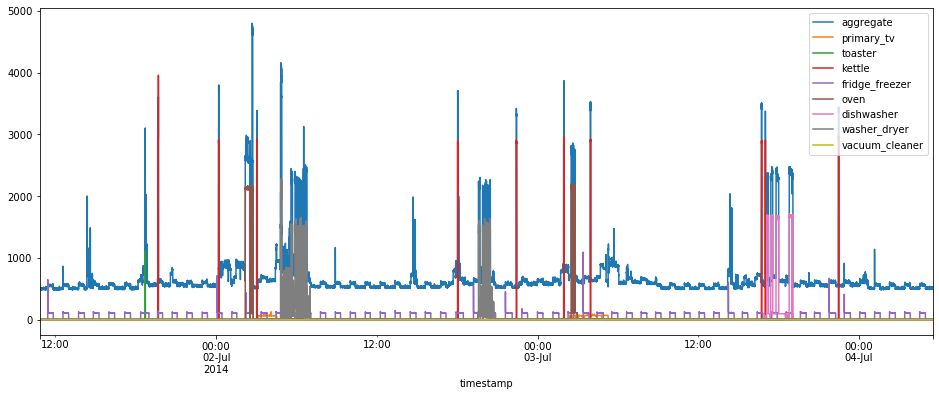

In [14]:
t = 10000
df_all_re_inter.iloc[t:t+40000,:].plot(figsize=(16,6))

In [17]:
df_all_re_inter.head(200)

,aggregate,primary_tv,toaster,kettle,fridge_freezer,oven,dishwasher,washer_dryer,vacuum_cleaner
timestamp,,,,,,,,,
2014-06-30 18:09:30,657.0,0.0,0.0,2.0,0.0,0.0,0.0,14.0,0.0
2014-06-30 18:09:36,652.0,0.0,0.0,2.0,0.0,0.0,0.0,14.0,0.0
2014-06-30 18:09:42,649.0,0.0,0.0,2.0,0.0,0.0,0.0,14.0,0.0
2014-06-30 18:09:48,641.0,0.0,0.0,2.0,0.0,0.0,0.0,14.0,0.0
2014-06-30 18:09:54,633.0,0.0,0.0,2.0,0.0,0.0,0.0,14.0,0.0
...,...,...,...,...,...,...,...,...,...
2014-06-30 18:29:00,624.0,0.0,0.0,2.0,0.0,0.0,0.0,14.0,0.0
2014-06-30 18:29:06,626.0,0.0,0.0,2.0,0.0,0.0,0.0,14.0,0.0
2014-06-30 18:29:12,623.0,0.0,0.0,2.0,0.0,0.0,0.0,14.0,0.0
